In [72]:
import copy
import os
import sys
sys.path.append("/home/diego/python/auditory-cortex/data/")
sys.path.append('/home/diego/python/utils/')

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import torch
from torch.optim import Adam
# import seaborn as sns

from gglm.glm.base import GLM
# from gglm.glm.torchglm import TorchGLM
# from gglm.glm.mmdglm import MMDGLM
# from gglm.cnncritic import MMDCritic
from sptr.sptr import SpikeTrain
from kernel.fun import KernelFun
from kernel.rect import KernelRect

import myplt

from celldata import CellData

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
palette = dict(dc='dodgerblue', fr='C3')

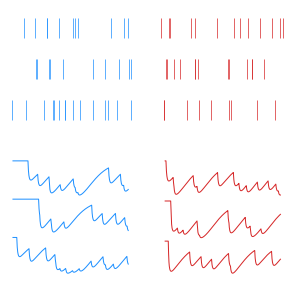

In [79]:
# num_epochs = 200
# lr = 5e-2
eta_true = KernelFun.exponential([20, 10], coefs=[-3, 3])
glm_true = GLM(u0=-4, eta=eta_true.copy())

t = np.arange(0, 1000, 1)
_, _, mask_spikes_te = glm_true.sample(t, shape=(3,))
st_te = SpikeTrain(t, mask_spikes_te)

eta_fit = KernelFun.exponential([100, 10], coefs=[-1, 1])
glm_fit = GLM(u0=-3.6, eta=eta_fit.copy())

# opt = glm.fit(st_dc.t, st_dc.mask, verbose=True)

# n_batch_fr = 3

# mask = st_val.mask[:, np.array([3, 7, 8])]

_, r_te = glm_fit.sample_conditioned(t, mask_spikes_te)
_, r_fr, mask_spikes_fr = glm_fit.sample(t, shape=(3,))
st_fr = SpikeTrain(t, mask_spikes_fr)

for ii in range(1, 3):
    r_te[:, ii] += np.max(r_te[:, ii - 1])
    r_fr[:, ii] += np.max(r_fr[:, ii - 1])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(5, 5), nrows=2, ncols=2)
ax1.set_ylim(-0.5, 2.5)
ax2.set_ylim(-0.5, 2.5)
st_te.plot(ax=ax1, marker='|', ms=20, mew=0.7, color=palette['dc'])
st_fr.plot(ax=ax2, marker='|', ms=20, mew=0.7, color=palette['fr'])
lw = 1
ax3.plot(t, r_te, color=palette['dc'], lw=lw)
ax4.plot(t, r_fr, color=palette['fr'], lw=lw)

myplt.set_scale_bars(ax1)
myplt.set_scale_bars(ax2)
myplt.set_scale_bars(ax3)
myplt.set_scale_bars(ax4)

fig.savefig('/home/diego/Dropbox/projects/generative-glm/diagram.svg', transparent=True, bbox_inches='tight')

In [64]:
# num_epochs = 200
# lr = 5e-2
eta = KernelFun.exponential([2, 100], coefs=[0, 0])
glm_true = GLM(u0=-4, eta=eta.copy())
opt = glm.fit(st_dc.t, st_dc.mask, verbose=True)

n_batch_fr = 3

mask = st_val.mask[:, np.array([3, 7, 8])]

_, r_te = glm.sample_conditioned(st_val.t, mask)
_, r_fr, mask_spikes_fr = glm.sample(st_val.t, shape=(n_batch_fr,))
# st_fr_ml = SpikeTrain(st_val.t, mask_spikes_fr_ml[:, np.random.choice(n_batch_fr, size=)])
st_te = SpikeTrain(st_val.t, mask)
st_fr = SpikeTrain(st_val.t, mask_spikes_fr)
# mean_r_fr_ml = np.mean(r_fr_ml, 1)
# sum_r_fr_ml = np.sum(r_fr_ml, 1)

# fig, (ax1, ax2) = plt.subplots(ncols=2)
# ax1.plot(mean_r_fr_ml)
# ax2.plot(mean_r_fr_ml2)
# # plt.plot(mean_r_fr_ml2)

# fig, (ax1, ax2) = plt.subplots(ncols=2)
# glm.eta.plot(ax=ax1)
# glm2.eta.plot(ax=ax1)
# ax2.plot(loss_ml)
# ax2.plot(-opt.obj_iterations)

Starting gradient ascent... 

 Iteration 6 of 200 | Elapsed time: 0.22 seconds | objective=-3035.84
 
 Iteration 6 of 200 | Converged | Elapsed time: 0.0037 minutes | Log posterior is monotonic 



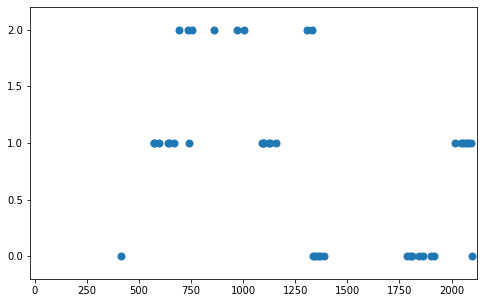

In [15]:
st_te.plot()